In [1]:
# Import Libraries
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import Machine Learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
# Import NLP libraries
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [6]:
# Uploading Dataset
data = files.upload()

Saving Dataset.xlsx to Dataset.xlsx


In [8]:
# Uploading the sheets into the dataframe
dealers = pd.read_excel('Dataset.xlsx', sheet_name='Dealers')
customers = pd.read_excel('Dataset.xlsx', sheet_name='Customers')
claims = pd.read_excel('Dataset.xlsx', sheet_name='Claims')
parts = pd.read_excel('Dataset.xlsx', sheet_name='Parts')
transactions = pd.read_excel('Dataset.xlsx', sheet_name='Transactions')
vendors = pd.read_excel('Dataset.xlsx', sheet_name='Vendors')

In [9]:
dealers.head()

,Dealer_ID,Dealer_Name,Dealer_Country,State,City,ZIpCode
0,1.0,Kenneth Schmitt,india,Goa,Panji,400001.0
1,2.0,Owen Mclaughlin,india,Delhi,Naoida,400002.0
2,3.0,Donald Repinski,india,Karnataka,Bangalore,400003.0
3,4.0,Rachel Oszust,india,Gujrat,Ahemdabad,400004.0
4,5.0,Lynn Knapp,india,Orrisa,Cuttack,400005.0


In [10]:
claims.head(11)

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace
0,1.0,2020-04-01,36000.0,5.0,104.0,901.0,rpr
1,2.0,2020-04-01,42000.0,6.0,106.0,902.0,rplc
2,3.0,2020-04-01,45000.0,4.0,103.0,903.0,rpr
3,4.0,2020-04-01,56000.0,3.0,102.0,904.0,rplc
4,5.0,2020-04-01,39000.0,2.0,105.0,905.0,rpr
5,6.0,2020-04-01,48000.0,1.0,101.0,906.0,rplc
6,7.0,2020-04-01,53000.0,5.0,110.0,901.0,rplc
7,8.0,2020-04-01,59000.0,4.0,124.0,903.0,rplc
8,9.0,2020-04-01,25000.0,6.0,109.0,906.0,rpr
9,10.0,2020-04-01,29000.0,3.0,115.0,907.0,rplc


In [11]:
parts.head(11)

,Part_ID,Part_Name,Manufacturer_ID,Manf_Date
0,901.0,brake pad,501.0,1996-08-12
1,902.0,axle,502.0,1997-03-03
2,903.0,tie rod,503.0,1997-06-13
3,904.0,differential,504.0,1997-01-14
4,905.0,rear suspension,505.0,1996-08-19
5,906.0,radiator,506.0,1997-03-24
6,907.0,clutch kits,503.0,1997-05-12
7,908.0,pressure plates,502.0,1997-05-20
8,909.0,flywheels,505.0,1997-06-29
9,910.0,torque converters,506.0,1997-07-17


In [12]:
parts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Part_ID          11 non-null     float64       
 1   Part_Name        11 non-null     object        
 2   Manufacturer_ID  11 non-null     float64       
 3   Manf_Date        11 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 480.0+ bytes


In [13]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20095 entries, 0 to 20094
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   claim_id           20095 non-null  float64       
 1   claim_date         20095 non-null  datetime64[ns]
 2   claim_amount       20095 non-null  float64       
 3   Dealer_ID          20095 non-null  float64       
 4   Cust_ID            20095 non-null  float64       
 5   Part_ID            20095 non-null  float64       
 6   Repair_or_Replace  20095 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 1.1+ MB


**Requirement 1: Monthly report of top ten Dealers and parts that has been failed**
* extended warranty of parts and also need to find out the most frequent part’s which are reported as a defective.
* The list of top ten dealers helps the company to analyze and understand the performances of dealers.
* Monthly report of top ten failed parts helps the company to understand following:
a) Quality of the parts 
b) Pattern of failure
c) Mostly reported failed part in the quarter/year
- Data visualization libraries like seaborn and matplotlib are used to visualize the data.


In [14]:
dealer = claims.groupby('Dealer_ID').count()
failed_dealers = dealer.sort_values(by='Cust_ID',ascending=False).reset_index().head(10)['Dealer_ID']

In [15]:
dealer.head()

,claim_id,claim_date,claim_amount,Cust_ID,Part_ID,Repair_or_Replace
Dealer_ID,,,,,,
1.0,922,922,922,922,922,922
2.0,922,922,922,922,922,922
3.0,922,922,922,922,922,922
4.0,218,218,218,218,218,218
5.0,971,971,971,971,971,971


In [16]:
failed_dealers # Dealers that have the most claims

0       5.0
1       1.0
2       3.0
3       2.0
4       6.0
5       4.0
6    1262.0
7    1270.0
8    1269.0
9    1268.0
Name: Dealer_ID, dtype: float64

In [17]:
claims['Dealer_ID'].value_counts().head(10)

5.0       971
3.0       922
2.0       922
1.0       922
6.0       394
4.0       218
1248.0    176
1256.0    176
1255.0    176
1254.0    176
Name: Dealer_ID, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


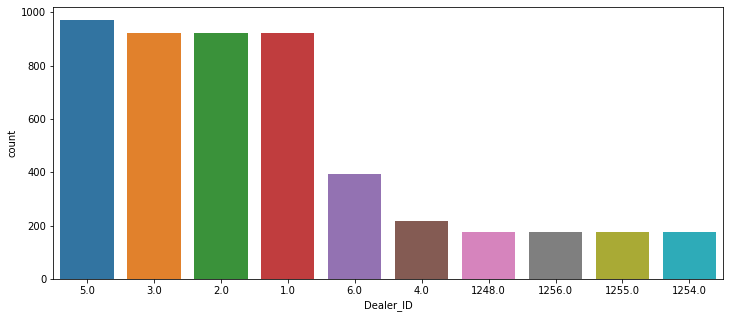

In [18]:
plt.figure(figsize=(12,5))
sns.countplot(claims['Dealer_ID'], order=pd.value_counts(claims['Dealer_ID']).iloc[:10].index)

In [19]:
failed_dealers_info = pd.DataFrame()
for i in failed_dealers:
  failed_dealers_info = pd.concat([failed_dealers_info, dealers[dealers['Dealer_ID'] == i]])

In [20]:
failed_dealers_info # Complete information of the dealers that have the most claims

,Dealer_ID,Dealer_Name,Dealer_Country,State,City,ZIpCode
4,5.0,Lynn Knapp,india,Orrisa,Cuttack,400005.0
0,1.0,Kenneth Schmitt,india,Goa,Panji,400001.0
2,3.0,Donald Repinski,india,Karnataka,Bangalore,400003.0
1,2.0,Owen Mclaughlin,india,Delhi,Naoida,400002.0
5,6.0,Harold Hamff,india,Maharashtra,Mumbai,400006.0
3,4.0,Rachel Oszust,india,Gujrat,Ahemdabad,400004.0
1261,1262.0,Andrew Hatcher,india,Orrisa,Cuttack,400005.0
1269,1270.0,John Konty,india,Maharashtra,Mumbai,400006.0
1268,1269.0,John Nash,india,Orrisa,Cuttack,400005.0
1267,1268.0,Richard Lammers,india,Gujrat,Ahemdabad,400004.0


In [21]:
part = claims.groupby('Part_ID').count()
failed_parts = part.sort_values(by='Cust_ID',ascending=False).reset_index().head(10)['Part_ID']

In [22]:
failed_parts # The parts that failed most of times

0    906.0
1    901.0
2    905.0
3    907.0
4    902.0
5    903.0
6    904.0
Name: Part_ID, dtype: float64

In [23]:
january_data = claims[claims['claim_date'].dt.month == 1]
january_data['Part_ID'].value_counts().head(10)

906.0    3702
907.0    3085
905.0    3085
901.0    3085
902.0    1851
903.0    1851
904.0    1851
Name: Part_ID, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


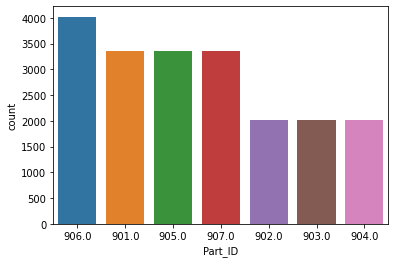

In [24]:
# Graph of the most failed parts
sns.countplot(claims['Part_ID'], order=pd.value_counts(claims['Part_ID']).iloc[:10].index)

In [25]:
# For Complete information of the failed parts
failed_parts_info = pd.DataFrame()
for i in failed_parts:
  failed_parts_info = pd.concat([failed_parts_info, parts[parts['Part_ID'] == i]])

In [26]:
failed_parts_info.head() # complete information of the parts that have been failing most of the time

,Part_ID,Part_Name,Manufacturer_ID,Manf_Date
5,906.0,radiator,506.0,1997-03-24
0,901.0,brake pad,501.0,1996-08-12
4,905.0,rear suspension,505.0,1996-08-19
6,907.0,clutch kits,503.0,1997-05-12
1,902.0,axle,502.0,1997-03-03


**Requirement 2: Predict the parts that may fail according to the location, mileage and age**
* In this case, by analyzing the historical data, we need to predict the parts that can be expected 
to fail according to the age, km driven and location of the vehicle.
* This data helps the company to understand the manufacturing requirements of the part i.e. 
which part is to be manufactured in what quantity so as to avoid unavailability of the parts 
when claim is raised for that part.

In [27]:
age = (claims['claim_date'] - parts['Manf_Date']) / np.timedelta64(1, 'Y')

In [28]:
age.head(12)

0     23.636351
1     23.080556
2     22.801290
3     23.211976
4     23.617186
5     23.023060
6     22.888903
7     22.866999
8     22.757483
9     22.708201
10    22.606898
11          NaN
dtype: float64

In [29]:
# Age of the parts calculated by the formula: claimed date - Manufactured date
age = []
for i in range(len(claims)):
  for j in range(len(parts)):
    if claims.loc[i]['Part_ID'] == parts.loc[j]['Part_ID']:
      age.append((claims.loc[i]['claim_date'] - parts.loc[j]['Manf_Date']) / np.timedelta64(1, 'Y'))


In [30]:
len(age)

20095

In [ ]:
# Converting to an array
ages = np.array(age)

In [ ]:
# Calculating the mileage.
mileage = ages*12000

In [ ]:
# Adding the columns into the claims dataframe
claims['Age'] = ages
claims['Mileage'] = mileage

In [ ]:
claims.head()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,Age,Mileage
0,1,2020-04-01,36000,5,104,901,rpr,23.636351,283636.214296
1,2,2020-04-01,42000,6,106,902,rplc,23.080556,276966.672827
2,3,2020-04-01,45000,4,103,903,rpr,22.801290,273615.474650
3,4,2020-04-01,56000,3,102,904,rplc,23.211976,278543.707263
4,5,2020-04-01,39000,2,105,905,rpr,23.617186,283406.230107


In [ ]:
# Merging two dataframes to find the location of the dealer
loc = claims.merge(dealers)

In [ ]:
loc.head()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,Age,Mileage,Dealer_Name,Dealer_Country,State,City,ZIpCode
0,1,2020-04-01,36000,5,104,901,rpr,23.636351,283636.214296,Lynn Knapp,india,Orrisa,Cuttack,400005
1,7,2020-04-01,53000,5,110,901,rplc,23.636351,283636.214296,Lynn Knapp,india,Orrisa,Cuttack,400005
2,11,2020-04-01,53000,5,114,903,rplc,22.801290,273615.474650,Lynn Knapp,india,Orrisa,Cuttack,400005
3,17,2020-04-01,61000,5,118,901,rplc,23.636351,283636.214296,Lynn Knapp,india,Orrisa,Cuttack,400005
4,21,2020-04-01,53000,5,128,906,rplc,23.023060,276276.720261,Lynn Knapp,india,Orrisa,Cuttack,400005


In [ ]:
# Converting non-numeric data into numeric
loc['City'] = pd.factorize(loc['City'])[0]

In [ ]:
loc.head()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,Age,Mileage,Dealer_Name,Dealer_Country,State,City,ZIpCode
0,1,2020-04-01,36000,5,104,901,rpr,23.636351,283636.214296,Lynn Knapp,india,Orrisa,0,400005
1,7,2020-04-01,53000,5,110,901,rplc,23.636351,283636.214296,Lynn Knapp,india,Orrisa,0,400005
2,11,2020-04-01,53000,5,114,903,rplc,22.801290,273615.474650,Lynn Knapp,india,Orrisa,0,400005
3,17,2020-04-01,61000,5,118,901,rplc,23.636351,283636.214296,Lynn Knapp,india,Orrisa,0,400005
4,21,2020-04-01,53000,5,128,906,rplc,23.023060,276276.720261,Lynn Knapp,india,Orrisa,0,400005


In [ ]:
# Saving the columns as per the requirement
parts_failed = loc[['Age', 'Mileage', 'City', 'Part_ID']]

In [ ]:
loc.to_excel('claims.xlsx')

In [ ]:
files.download('claims.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
parts_failed.head()

,Age,Mileage,City,Part_ID
0,23.636351,283636.214296,0,901
1,23.636351,283636.214296,0,901
2,22.801290,273615.474650,0,903
3,23.636351,283636.214296,0,901
4,23.023060,276276.720261,0,906


In [ ]:
parts_failed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20095 entries, 0 to 20094
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      20095 non-null  float64
 1   Mileage  20095 non-null  float64
 2   City     20095 non-null  int64  
 3   Part_ID  20095 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 785.0 KB


In [ ]:
# Creating the standard scalar object to scale the data
scaler = StandardScaler()

In [ ]:
x = parts_failed.drop('Part_ID',axis=1)

In [ ]:
scaler.fit(x)

StandardScaler()

In [ ]:
scaled_features = scaler.transform(x)

In [ ]:
df_feat = pd.DataFrame(scaled_features,columns=parts_failed.columns[:-1])
df_feat.head()

,Age,Mileage,City
0,-0.860593,-0.860593,-1.49748
1,-0.860593,-0.860593,-1.49748
2,-3.070233,-3.070233,-1.49748
3,-0.860593,-0.860593,-1.49748
4,-2.483410,-2.483410,-1.49748


In [ ]:
# Using train test split on the data for testing
X_train, X_test, y_train, y_test = train_test_split(scaled_features,parts_failed['Part_ID'],
                                                    test_size=0.30,random_state=40)

In [ ]:
# Used KNN here 
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
confusion_matrix(y_pred, y_test)

array([[ 990,    0,    0,    3,    6,    1,    0],
       [   1,  591,    0,    0,    1,    4,    2],
       [   0,    5,  620,    3,    4,    7,    1],
       [   1,    0,    2,  591,    1,    3,    5],
       [   4,    0,    0,    0, 1032,    0,    0],
       [   0,    2,    1,    2,    1, 1156,    4],
       [   0,    3,    1,    1,    2,    1,  977]])

In [ ]:
accuracy_score(y_pred, y_test)*100

98.80577210150938

**Requirement 3: To determine whether the defective part is to be replaced or repaired**
- The model was developed to decide whether the failed part has to be repaired or replaced with 
the new one.
- For this, we had the last claimed data of the company.
- As this is the binary classification problem, Decision tree and Random Forest algorithms are 
used to build the model.


In [ ]:
# Converting non-numeric data into numeric
claims['Repair_or_Replace'] = pd.get_dummies(claims['Repair_or_Replace'], drop_first=True)

In [ ]:
claims.head()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,Age,Mileage
0,1,2020-04-01,36000,5,104,901,1,23.636351,283636.214296
1,2,2020-04-01,42000,6,106,902,0,23.080556,276966.672827
2,3,2020-04-01,45000,4,103,903,1,22.801290,273615.474650
3,4,2020-04-01,56000,3,102,904,0,23.211976,278543.707263
4,5,2020-04-01,39000,2,105,905,1,23.617186,283406.230107


In [ ]:
# Splitting the data into x, y as per the requirement and correlation
x = claims[['claim_amount', 'Part_ID', 'Age', 'Mileage']]
y = claims['Repair_or_Replace']

In [ ]:
scalar = StandardScaler()

In [ ]:
scalar.fit(x)

StandardScaler()

In [ ]:
scaled_features = scalar.fit_transform(x)

In [ ]:
df_feat_reprlc = pd.DataFrame(scaled_features,columns=['claim_amount', 'Part_ID', 'Age', 'Mileage'])
df_feat_reprlc.head()

,claim_amount,Part_ID,Age,Mileage
0,-0.916372,-1.558062,-0.860593,-0.860593
1,-0.418021,-1.081070,-2.331271,-2.331271
2,-0.168845,-0.604079,-3.070233,-3.070233
3,0.744799,-0.127087,-1.983525,-1.983525
4,-0.667196,0.349905,-0.911306,-0.911306


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.30,random_state=40)

In [ ]:
# used random forest classifier as instructed in the requirement
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)

In [ ]:
accuracy_score(y_test,pred )*100

99.93365400563941

**Requirement 4: Customer Retention Model**

In [31]:
# Loading dummy data for the customers review
data = files.upload()

Saving preprocessed_kindle_review .csv to preprocessed_kindle_review .csv


In [ ]:
kindle_review = pd.read_csv('preprocessed_kindle_review .csv', index_col=0) 

In [ ]:
kindle_review.drop('summary', axis = 1, inplace=True)

In [ ]:
kindle_review.head()

,rating,reviewText
0,5,This book was the very first bookmobile book I...
1,1,"When I read the description for this book, I c..."
2,5,I just had to edit this review. This book is a...
3,5,I don't normally buy 'mystery' novels because ...
4,5,"This isn't the kind of book I normally read, a..."


In [ ]:
kindle_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rating      12000 non-null  int64 
 1   reviewText  12000 non-null  object
dtypes: int64(1), object(1)
memory usage: 281.2+ KB


In [ ]:
cust_names = list(customers['Cust_Name'].unique())

In [ ]:
cust_ret = claims.merge(customers)

In [ ]:
cust_ret.head()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace,Age,Mileage,Cust_Name,Country,State,City,ZipCode
0,1,2020-04-01,36000,5,104,901,1,23.636351,283636.214296,reyansh,ind,orrisa,cuttack,543211
1,2643,2021-01-24,45000,5,104,903,1,23.617186,283406.230107,reyansh,ind,orrisa,cuttack,543211
2,3223,2021-01-24,25000,5,104,904,0,24.027872,288334.462720,reyansh,ind,orrisa,cuttack,543211
3,4015,2021-01-24,33000,5,104,902,1,23.896452,286757.428284,reyansh,ind,orrisa,cuttack,543211
4,4595,2021-01-24,39000,5,104,905,1,24.433082,293196.985564,reyansh,ind,orrisa,cuttack,543211


In [ ]:
customers.nunique()

Cust_ID      287900
Cust_Name       840
Dealer_ID        87
Country           1
State             6
City              6
ZipCode           6
dtype: int64

In [ ]:
cust = list(cust_ret['Cust_Name'].unique())

In [ ]:
cust_ret.nunique()

claim_id             556
claim_date             9
claim_amount          20
Dealer_ID              6
Cust_ID              139
Part_ID                7
Repair_or_Replace      2
Age                   38
Mileage               38
Cust_Name            125
Country                1
State                  6
City                   6
ZipCode                6
dtype: int64

In [ ]:
retention_cx = [customer for customer in cust_names if customer not in cust]

In [ ]:
len(retention_cx)

715

In [ ]:
retention = pd.DataFrame(columns=customers.columns)
for i in retention_cx:
  if i not in retention['Cust_Name']:
    retention = pd.concat([retention,customers[customers['Cust_Name']== i]])

retention = retention.drop('Cust_ID', axis=1).drop_duplicates()

In [ ]:
retention.head()

,Cust_Name,Dealer_ID,Country,State,City,ZipCode
30,Erica,64,ind,goa,panaji,402201
36,Erica,70,ind,goa,panaji,402201
434,Erica,1,ind,orrisa,cuttack,543211
31,Esther,65,ind,karnataka,banglore,403315
648,Esther,1,ind,orrisa,cuttack,543211


In [ ]:
retention.to_excel('retention Customers.xlsx')

In [ ]:
files.download('retention Customers.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Valence Aware Dictionary and sEntiment Reasoner
nltk.download(['averaged_perceptron_tagger', 'punkt', 'vader_lexicon'])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
sia = SentimentIntensityAnalyzer()
scores = []
for i in range(len(kindle_review)):
  text = kindle_review['reviewText'][i]
  score = sia.polarity_scores(text)
  scores.append(score['compound'])

scores = np.array(scores)

In [ ]:
kindle_review['Positive_Scores'] = scores

In [ ]:
kindle_review.head()

,rating,reviewText,Positive_Scores
0,5,This book was the very first bookmobile book I...,0.8442
1,1,"When I read the description for this book, I c...",-0.6077
2,5,I just had to edit this review. This book is a...,0.9977
3,5,I don't normally buy 'mystery' novels because ...,0.5492
4,5,"This isn't the kind of book I normally read, a...",0.8958


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288000 entries, 0 to 287999
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Cust_ID    288000 non-null  int64 
 1   Cust_Name  288000 non-null  object
 2   Dealer_ID  288000 non-null  int64 
 3   Country    288000 non-null  object
 4   State      288000 non-null  object
 5   City       288000 non-null  object
 6   ZipCode    288000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 15.4+ MB


In [ ]:
customers_unique = customers.drop('Cust_ID',axis=1).drop_duplicates()

In [ ]:
customers_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Cust_Name  1970 non-null   object
 1   Dealer_ID  1970 non-null   int64 
 2   Country    1970 non-null   object
 3   State      1970 non-null   object
 4   City       1970 non-null   object
 5   ZipCode    1970 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 107.7+ KB


In [ ]:
customers_unique.reset_index(inplace = True)

In [ ]:
customers_reviews = pd.concat([customers_unique, kindle_review.iloc[:1970]], axis=1)

In [ ]:
customers_reviews

,index,Cust_Name,Dealer_ID,Country,State,City,ZipCode,rating,reviewText,Positive_Scores
0,0,pushpak,1,ind,goa,panaji,402201,5,This book was the very first bookmobile book I...,0.8442
1,1,raj,3,ind,karnataka,banglore,403315,1,"When I read the description for this book, I c...",-0.6077
2,2,ranbir,4,ind,gujrat,ahemadabad,326665,5,I just had to edit this review. This book is a...,0.9977
3,3,reyansh,5,ind,orrisa,cuttack,543211,5,I don't normally buy 'mystery' novels because ...,0.5492
4,4,raunak,2,ind,delhi,noida,426232,5,"This isn't the kind of book I normally read, a...",0.8958
...,...,...,...,...,...,...,...,...,...,...
1965,1994,Dawn,3,ind,goa,panaji,402201,5,Oh how wish this story could have gone on and...,0.9786
1966,1996,Tim,4,ind,maharashtra,mumbai,215432,1,I love Heather Webber's Lucy Valentine series ...,0.8626
1967,1997,Laurie,5,ind,orrisa,cuttack,543211,2,The story line just drug on and on. I did not ...,0.2709
1968,1998,Katie,2,ind,karnataka,banglore,403315,1,I pre-ordered this on my Kindle because I real...,0.8882


In [ ]:
customers_reviews['Positive_Scores'].mean()

0.48810253807106596

In [ ]:
retention_customers = customers_reviews[customers_reviews['Positive_Scores'] < 0.48810253807106596]

In [ ]:
retention_customers.head()

In [ ]:
retention_customers.info()